# DoE (Design of Experiment)
Disediakan dataset <i>Banknote Authentication</i> yang dapat didownload pada link [berikut](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#). Lakukan prediksi apakah suatu data banknote authentic atau forgery (kolom **class**), bernilai 0 jika authentic, dan 1 jika forgery.

# 0. Loading Data and Library

In [2]:
# Put your library here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [3]:
# Read data here
df = pd.read_csv("data_banknote_authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# I. Data Understanding
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal ini meliputi:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (outlier)
4. Korelasi
5. Distribusi

## I.1
Carilah:
1. Ukuran dari data (instances dan features)
2. Tipe dari tiap-tiap fitur
3. Banyaknya unique values dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal

In [4]:
# I.1 Put your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


1. Ukuran datanya adalah 1372 baris x 5 kolom.
2. Fitur variance, skewness, curtosis, entropy merupakan fitur numerik. Class merupakan fitur kategorikal karena walaupun tipe datanya integer, class melambangkan suatu kelas-kelas tertentu (kategori) yang dinyatakan sebagai angka.

In [5]:
df['class'].unique()

array([0, 1], dtype=int64)

3. Terdapat 2 unique value untuk kolom class, yaitu 0 dan 1.

In [6]:
df.drop(['class'], axis=1).describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


4. Untuk tabel di atas, baris menandakan jenis statistik, kolom menandakan fitur data. Baris max menandakan nilai maksimum, min menandakan nilai minimum, std menandakan standar deviasi, mean menandakan nilai rata-rata, 50% menandakan persentil ke-50 (median)

## I.2
Carilah:
1. Missing values dari tiap fitur
2. Outliers dari tiap fitur (gunakan metode yang kalian ketahui)

In [7]:
# I.2 Put your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


1. Seluruh kolom tidak memiliki missing values.

In [8]:
# variance
q1_variance = df['variance'].quantile(0.25)
q3_variance = df['variance'].quantile(0.75)
iqr_variance = q3_variance - q1_variance
upper_bound_variance = q3_variance + 1.5 * iqr_variance
lower_bound_variance = q1_variance - 1.5 * iqr_variance
print(f"Upper bound = {upper_bound_variance}")
print(f"Lower bound = {lower_bound_variance}")

df[(df['variance'] < lower_bound_variance) | (df['variance'] > upper_bound_variance)]

Upper bound = 9.7131875
Lower bound = -8.6647125


,variance,skewness,curtosis,entropy,class


In [9]:
# skewness
q1_skewness = df['skewness'].quantile(0.25)
q3_skewness = df['skewness'].quantile(0.75)
iqr_skewness = q3_skewness - q1_skewness
upper_bound_skewness = q3_skewness + 1.5 * iqr_skewness
lower_bound_skewness = q1_skewness - 1.5 * iqr_skewness
print(f"Upper bound = {upper_bound_skewness}")
print(f"Lower bound = {lower_bound_skewness}")

df[(df['skewness'] < lower_bound_skewness) | (df['skewness'] > upper_bound_skewness)]

Upper bound = 19.5988625
Lower bound = -14.4924375


,variance,skewness,curtosis,entropy,class


In [10]:
# curtosis
q1_curtosis = df['curtosis'].quantile(0.25)
q3_curtosis = df['curtosis'].quantile(0.75)
iqr_curtosis = q3_curtosis - q1_curtosis
upper_bound_curtosis = q3_curtosis + 1.5 * iqr_curtosis
lower_bound_curtosis = q1_curtosis - 1.5 * iqr_curtosis
print(f"Upper bound = {upper_bound_curtosis}")
print(f"Lower bound = {lower_bound_curtosis}")

df[(df['curtosis'] < lower_bound_curtosis) | (df['curtosis'] > upper_bound_curtosis)]

Upper bound = 10.3105875
Lower bound = -8.7063125


,variance,skewness,curtosis,entropy,class
765,-3.8483,-12.8047,15.6824,-1.281000,1
780,-3.5801,-12.9309,13.1779,-2.567700,1
815,-3.1128,-6.8410,10.7402,-1.017200,1
816,-4.8554,-5.9037,10.9818,-0.821990,1
820,-4.0025,-13.4979,17.6772,-3.320200,1
821,-4.0173,-8.3123,12.4547,-1.437500,1
826,-4.2110,-12.4736,14.9704,-1.388400,1
841,-3.8858,-12.8461,12.7957,-3.135300,1
877,-5.1216,-5.3118,10.3846,-1.061200,1
881,-4.4861,-13.2889,17.3087,-3.219400,1


In [11]:
# entropy
q1_entropy = df['entropy'].quantile(0.25)
q3_entropy = df['entropy'].quantile(0.75)
iqr_entropy = q3_entropy - q1_entropy
upper_bound_entropy = q3_entropy + 1.5 * iqr_entropy
lower_bound_entropy = q1_entropy - 1.5 * iqr_entropy
print(f"Upper bound = {upper_bound_entropy}")
print(f"Lower bound = {lower_bound_entropy}")

df[(df['entropy'] < lower_bound_entropy) | (df['entropy'] > upper_bound_entropy)]

Upper bound = 4.6072
Lower bound = -6.62584


,variance,skewness,curtosis,entropy,class
41,-0.20620,9.2207,-3.704400,-6.8103,0
45,-0.78690,9.5663,-3.786700,-7.5034,0
47,-0.78690,9.5663,-3.786700,-7.5034,0
59,-0.78289,11.3603,-0.376440,-7.0495,0
139,-0.20620,9.2207,-3.704400,-6.8103,0
194,-2.34100,12.3784,0.704030,-7.5836,0
202,-0.78689,9.5663,-3.786700,-7.5034,0
291,-2.21530,11.9625,0.078538,-7.7853,0
341,-1.18040,11.5093,0.155650,-6.8194,0
394,-2.26230,12.1177,0.288460,-7.7581,0


## I.3
Carilah:
1. Korelasi antar fitur
2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)
3. Visualisasikan distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived

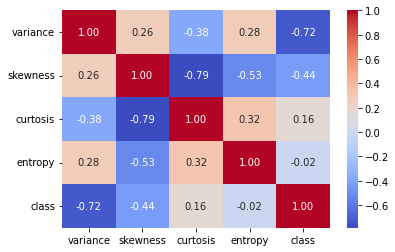

In [12]:
# I.3 Put your code here
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix Heatmap")
plt.show()

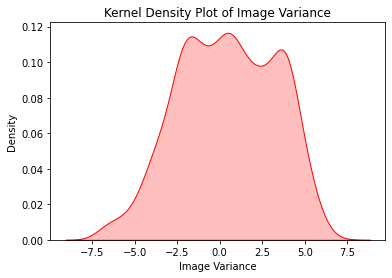

In [13]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['variance'], color='red', fill=True)
plt.title("Kernel Density Plot of Image Variance")
plt.xlabel("Image Variance")
plt.ylabel("Density")
plt.show()

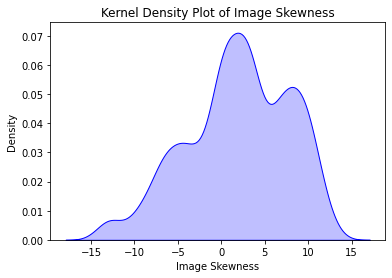

In [14]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['skewness'], color='blue', fill=True)
plt.title("Kernel Density Plot of Image Skewness")
plt.xlabel("Image Skewness")
plt.ylabel("Density")
plt.show()

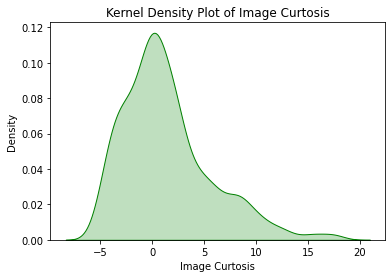

In [15]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['curtosis'], color='green', fill=True)
plt.title("Kernel Density Plot of Image Curtosis")
plt.xlabel("Image Curtosis")
plt.ylabel("Density")
plt.show()

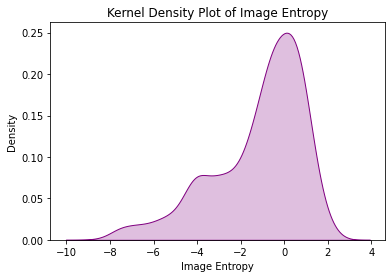

In [16]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['entropy'], color='purple', fill=True)
plt.title("Kernel Density Plot of Image Entropy")
plt.xlabel("Image Entropy")
plt.ylabel("Density")
plt.show()

<Figure size 432x288 with 0 Axes>

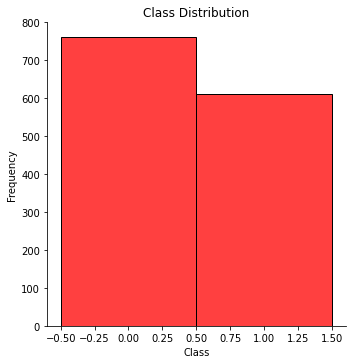

In [17]:
plt.figure(figsize=(6, 4))
sns.displot(df['class'], color='red', discrete=True)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

## I.4
Lakukanlah analisa pada data lebih lanjut jika dibutuhkan, kemudian lakukanlah:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan missing values
4. Transformasi data kategorikal menjadi numerikal (encoding), dengan metode yang kalian inginkan
5. Lakukan scaling dengan MinMaxScaler

In [18]:
# I.4 Put your code here
scaler = MinMaxScaler()
y = df['class']
X = df.drop(['class'], axis=1)
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['class'] = y
df_scaled

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1
1368,0.407690,0.332868,0.506753,0.808350,1
1369,0.237385,0.011768,0.985603,0.524755,1
1370,0.250842,0.201701,0.761587,0.660675,1


# II. Experiments Design
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal ini meliputi:
1. Pembuatan model
2. Proses validasi
3. Hyperparameter tuning

## II.1
Tentukanlah metrics yang akan digunakan pada eksperimen kali ini (dapat lebih dari 1 metric)

Put your answer for section II.1 here

Metric yang akan digunakan pada eksperimen kali ini adalah F1-score. F1-score merupakan salah satu metric yang dapat digunakan untuk binary classification. Berbeda dengan akurasi biasa, f1-score memperhitungkan rasio dari fitur target.

## II.2
Bagi data dengan perbandingan 0.8 untuk data train dan 0.2 untuk data validasi

In [19]:
# II.2 Put your code here
X_scaled = df_scaled.drop(['class'], axis=1)
y_scaled = df_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=1920)

## II.3
Lakukanlah:
1. Prediksi dengan menggunakan model Logistic Regression sebagai *baseline*
2. Tampilkan evaluasi dari model yang dibangun dari metrics yang anda tentukan pada II.1
3. Tampilkan confusion matrix

F1-score = 0.9802371541501976

Validation detail:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       149
           1       0.98      0.98      0.98       126

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



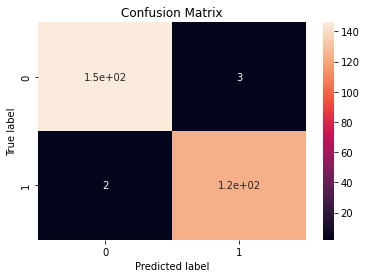

In [20]:
# II.3 Put your code here
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"F1-score = {f1}\n")
print("Validation detail:")
print(report)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

## II.4
Lakukanlah:
1. Pembelajaran dengan model lain
2. Hyperparameter tuning model yang kalian pakai dengan menggunakan Grid Search (perhatikan random factor pada beberapa algoritma model)
3. Lakukan validasi dengan menggunakan cross validation


In [21]:
# II.4 Put your code here
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'n_estimators' : [100, 300, 500]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [22]:
# Validation using test data
y_pred = best_model.predict(X_test)
f1 = f1_score(y_true=y_test, y_pred=y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"F1-score = {f1}\n")
print("Validation detail:")
print(report)

F1-score = 1.0

Validation detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       126

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [23]:
# Default parameter
model = XGBClassifier()
model.fit(X_train, y_train)

# Cross validation using the entire dataset
cross_val_f1 = cross_val_score(model, X_scaled, y_scaled, scoring='f1_macro', cv=5)
print(f"Cross validation f1-score: {cross_val_f1}")
print(f"Mean cross validation f1-score: {cross_val_f1.mean()}")

Cross validation f1-score: [0.99631984 0.99262102 0.99630902 1.         0.99630902]
Mean cross validation f1-score: 0.9963117784146795


In [24]:
# After grid search

# Cross validation using the entire dataset
cross_val_f1 = cross_val_score(best_model, X_scaled, y_scaled, scoring='f1_macro', cv=5)
print(f"Cross validation f1-score: {cross_val_f1}")
print(f"Mean cross validation f1-score: {cross_val_f1.mean()}")

Cross validation f1-score: [0.99631984 0.99631372 0.99630902 1.         1.        ]
Mean cross validation f1-score: 0.9977885160808608


# III. Improvement
Terdapat beberapa metode untuk melakukan peningkatan performa, contohnya adalah:
1. Melakukan oversampling / undersampling pada data
2. Menggabungkan beberapa model

Pada bagian ini, kalian diharapkan dapat:
1. Melakukan training dengan data hasil oversampling / undersampling dan melakukan validasi dengan benar
2. Memahami beberapa metode untuk menggabungkan beberapa model

## III.1
Lakukanlah:
1. Oversampling pada kelas minoritas pada data train, kemudian train dengan model *baseline* (II.3), lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2
2. Undersampling pada kelas mayoritas pada data train, kemudian train dengan model *baseline* (II.3) lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2

In [27]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_os, y_train_os = smt.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_os, y_train_os)
y_pred = model.predict(X_test)
print(f"F1-score = {f1_score(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))

F1-score = 0.9842519685039369

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       149
           1       0.98      0.99      0.98       126

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [30]:
# Undersampling using Near Miss
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_nm, y_train_nm)
y_pred = model.predict(X_test)
print(f"F1-score = {f1_score(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))

F1-score = 0.9802371541501976

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       149
           1       0.98      0.98      0.98       126

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



## III.2
Lakukanlah:
1. Eksplorasi soft voting, hard voting, dan stacking
2. Buatlah model Logistic Regression dan SVM (boleh menggunakan model dengan beberapa parameter yang berbeda)
3. Lakukanlah soft voting dari model-model yang sudah kalian buat pada poin 2
4. Lakukan hard voting dari model-model yang sudah kalian buat pada poin 2
5. Lakukanlah stacking dengan final classifier adalah Logistic Regression dari model-model yang sudah kalian buat pada poin 2
6. Lakukan validasi dengan metrics yang kalian tentukan untuk poin 3, 4, dan 5

Put your answer for section III.2 point 1 here

In [31]:
# Soft Voting
model_1 = LogisticRegression(penalty='l2', solver='liblinear')
model_2 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_3 = SVC(kernel='rbf', probability=True)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

class_prob_1 = model_1.predict_proba(X_test)
class_prob_2 = model_2.predict_proba(X_test)
class_prob_3 = model_3.predict_proba(X_test)

prob_avg = (class_prob_1[:, 0] + class_prob_2[:, 0] + class_prob_3[:, 0]) / 3
y_pred = np.where(prob_avg >= 0.5, 0, 1)

print(f"F1-score = {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

F1-score = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       126

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [32]:
# Hard Voting
model_1 = LogisticRegression(penalty='l2', solver='liblinear')
model_2 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_3 = SVC(kernel='rbf', probability=True)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

y_pred = np.where((y_pred_1 + y_pred_2 + y_pred_3) >= 2, 1, 0)

print(f"F1-score = {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

F1-score = 0.9842519685039369
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       149
           1       0.98      0.99      0.98       126

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [33]:
# Stacking (using class probability)

model_1 = LogisticRegression(penalty='l2', solver='liblinear')
model_2 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_3 = SVC(kernel='rbf', probability=True)

models = [('lr1', model_1), ('lr2', model_2), ('svm', model_3)]

meta_model = LogisticRegression()
stack_model = StackingClassifier(estimators=models, final_estimator=meta_model)
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)

print(f"F1-score = {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

F1-score = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       126

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# IV. Analisis
Bandingkan hasil dari:
1. Model Baseline (II.3)
2. Model lain (II.4)
3. Hasil undersampling
4. Hasil oversampling
5. Hasil soft voting
6. Hasil hard voting
7. Hasil stacking

Beberapa perbandingan hasil training:

- Model baseline (Logistic Regression) dengan model lain (XGBoost)
Pada test data, performa XGBoost lebih baik dibandingkan dengan Logistic Regression. Hal ini mungkin dikarenakan XGBoost merupakan model yang lebih robust dibandingkan logistic regression.

- Model XGBoost parameter default dengan model XGBoost hasil hyperparameter tuning
Berdasarkan hasil cross-validation, model XGBoost yang dilakukan hyperparameter tuning memiliki performa yang sedikit lebih baik dibandingkan model dengan parameter default.

- Model baseline, hasil undersampling, dan hasil oversampling.
Model logistic regression (parameter default) memiliki performa yang lebih baik terhadap data test ketika di-train terhadap data hasil oversampling jika dibandingkan dengan hasil undersampling dan data kontrol (data yang tidak dilakukan proses apa-apa). Hal ini disebabkan oleh penambahan informasi yang serupa pada kelas minoritas sehingga model dapat menangkap pola dengan lebih baik.
Proses undersampling tidak menambah performa model karena proses undersampling menghilangkan sebagian data, sementara jumlah data total sendiri sudah berjumlah sedikit.

- Model baseline, hasil soft voting, hasil hard voting, dan hasil stacking
Secara general, proses penggabungan beberapa model menyebabkan performa prediksi terhadap data test meningkat. Soft voting memiliki peningkatan yang cukup besar dikarenakan proses voting melibatkan probabilitas tiap kelas berdasarkan tiap model. Probabilitas kelas merupakan suatu patokan yang cukup baik karena nilainya merupakan nilai yang continuous dari 0 sampai 1. 
Hard voting memiliki peningkatan yang paling kecil dibandingkan yang lain karena proses voting mengacu pada hasil akhir klasifikasi (0 atau 1). Pada suatu kasus, bisa saja 1 merupakan mayoritas, namun total probabilitasnya tetap lebih besar kelas 0.
Stacking juga memiliki performa yang baik karena hasil input model-model sebelumnya dimasukkan lagi ke dalam model akhir (meta-model) sehingga dapat menangkap pola data dengan lebih baik.